# ACCESS-OM2 1$^\circ$

This notebook documents our first attempt to run and analyse output from the ACCESS-OM2 Pre-release, implemented at 1°.


## Current Status


|** Run Name** | **Forcing** | ** Run ** | ** Status **|
|--------------|---------|-------------------------------------------------|-------------|
|1deg_jra55_ryf_spinup1 | JRA55 RYF9091| A short 10 year spinup with first pre-release code. Had bugs in runoff and salt fluxes.| Aborted after 10 years.| 
|1deg_jra55_ryf_spinup2 | JRA55 RYF9091| second attempt at 1° test. | Up to 100 years.| 
|1deg_jra55_ryf_spinup3 | JRA55 RYF9091| Nic's version of 1° test. | Up to 100 years.| 


### Notes
* Some diagnostics are messed up by land mask problems. This  should be fixed by year 24.
* Ocean_month files don't open properly in the spinup1 case. Just ignore these.
* I haven't done overturning properly. In fact, I may not be saving the GM terms for this run.

**Last updated 21 August 2017**

In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

In [2]:
cc.build_index()

Searching /g/data3/hh5/tmp/cosima/
Searching /g/data1/v45/APE-MOM
Found 45773 .nc files
Using database sqlite:////g/data1/v45/cosima-cookbook/cosima-cookbook.db
Files already indexed: 44673
Files found but not yet indexed: 3154
Indexing new .nc files...
[########################################] | 100% Completed |  0.5s
Found 0 new variables
Saving results in database...
Indexing complete.


True

## Experiments

In [9]:
configuration = 'access-om2'
expts = cc.get_experiments(configuration)

configuration = 'mom-sis'
expts.extend(cc.get_experiments(configuration))
expts.pop(3)
display(expts)

# This subset of cases are the important ones
esub = expts.copy()
esub.pop(3)
esub.pop(2)
esub.pop(1)
display(esub)

['1deg_jra55_ryf_spinup2',
 '1deg_jra55_ryf_spinup1',
 '1deg_jra55_ryf_spinup3',
 '1deg_jra55_ryf_spinup4',
 'mom-sis_core-nyf',
 'mom-sis_jra-ryf']

['1deg_jra55_ryf_spinup2', 'mom-sis_core-nyf', 'mom-sis_jra-ryf']

## Wind Stress
Just a simple plot showing zonally averaged zonal wind stress from each case.

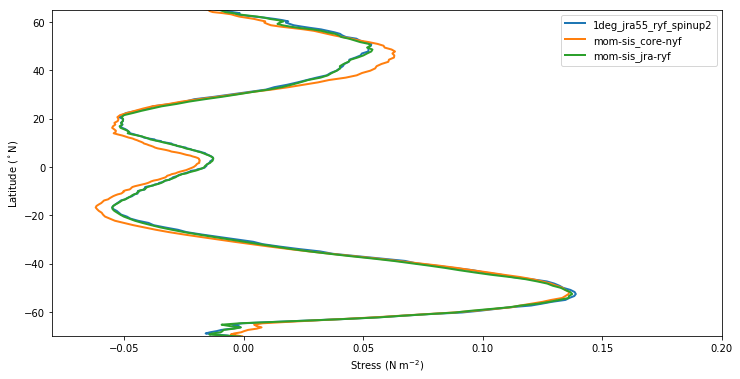

In [10]:
cc.plots.wind_stress(esub)

## Ocean Scalars
The following series of plots shows global timeseries of key metrics.

Calculating...done.


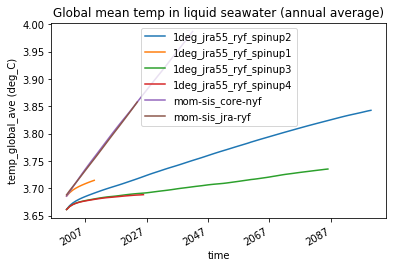

In [11]:
cc.plots.annual_scalar(expts, 'temp_global_ave')

Calculating...done.


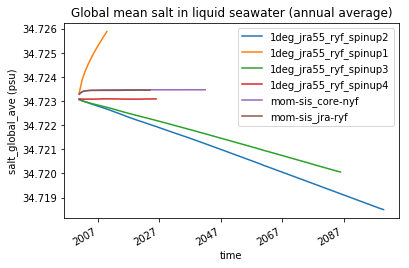

In [12]:
cc.plots.annual_scalar(expts, 'salt_global_ave')

Calculating...done.


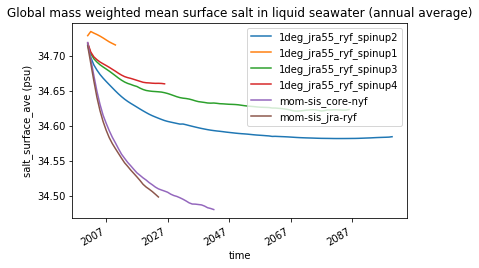

In [13]:
cc.plots.annual_scalar(expts, 'salt_surface_ave')

Calculating...done.


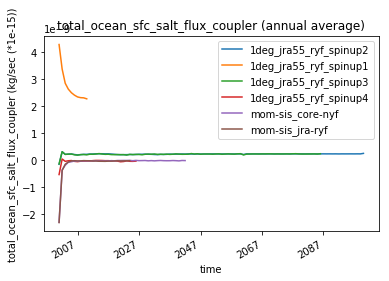

In [14]:
cc.plots.annual_scalar(expts, 'total_ocean_sfc_salt_flux_coupler')

In [16]:
variables = cc.netcdf_index.get_scalar_variables(configuration)

In [18]:
from ipywidgets import widgets, interact, interactive, fixed
interactive(cc.plots.annual_scalar,
            expts=fixed(expts),
            variable=widgets.Dropdown(options=variables, description='Scalar Variable:'))

A Jupyter Widget